# SETUP

In [262]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

# Importing all required packages
import numpy as np
import pandas as pd

# Data viz lib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks

from kmodes.kprototypes import KPrototypes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from plotly import graph_objects as go
import prince

In [263]:
dtafile = 'love_study_features_optimization_categorical.csv'

df = pd.read_csv(dtafile)
df.head()


,married / was married,couple,any relation,respondent gender,couple gender,interracial couple,respondent age,partner age,education gap,couple salary gap,couple political stability,meeting interface,try app service,relation duration [year],relation quality
0,no,no,yes,Male,gay male couple,no,[30 -40],[20 -30],2.0,I earned more,2.0,meet through internet,no,0.25,NaN
1,yes,yes,NaN,Female,hetero couple,no,[50 -60],[50 -60],0.0,[Partner Name] earned more,5.0,meet through work,NaN,21.92,Excellent
2,yes,yes,NaN,Male,hetero couple,no,[40 -50],[40 -50],3.0,I earned more,6.0,meet through internet,NaN,11.08,Good
3,no,no,yes,Female,lesbian couple,no,[20 -30],[20 -30],0.0,I earned more,3.0,meet through internet,NaN,0.17,NaN
4,yes,yes,NaN,Female,hetero couple,no,[50 -60],[50 -60],0.0,[Partner Name] earned more,6.0,meet in neighborhood,NaN,33.75,Excellent


In [264]:
df["try app service"].value_counts()

no     227
yes     98
Name: try app service, dtype: int64

# Analysis on people using an App

### Dataset prep

In [265]:
use_app = df["try app service"]=="yes"

df_app = df[use_app]
df_app

,married / was married,couple,any relation,respondent gender,couple gender,interracial couple,respondent age,partner age,education gap,couple salary gap,couple political stability,meeting interface,try app service,relation duration [year],relation quality
12,no,no,yes,Male,hetero couple,no,[20 -30],[20 -30],0.0,[Partner Name] earned more,5.0,meet through internet,yes,0.08,NaN
40,yes,yes,NaN,Male,hetero couple,no,[40 -50],[50 -60],4.0,[Partner Name] earned more,6.0,meet through work,yes,29.42,Excellent
43,NaN,yes,NaN,Male,hetero couple,no,[30 -40],[30 -40],0.0,We earned about the same amount,4.0,meet through internet,yes,0.08,Excellent
94,yes,yes,NaN,Male,hetero couple,no,[40 -50],[40 -50],0.0,I earned more,2.0,meet through friends,yes,21.58,Fair
114,yes,yes,NaN,Male,hetero couple,yes,[40 -50],[40 -50],0.0,I earned more,5.0,NaN,yes,41.50,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3470,no,no,yes,Female,hetero couple,no,[20 -30],[20 -30],1.0,We earned about the same amount,5.0,NaN,yes,0.50,NaN
3476,yes,yes,NaN,Male,gay male couple,no,[30 -40],[30 -40],0.0,[Partner Name] earned more,5.0,meet through internet,yes,6.42,Excellent
3492,no,no,yes,Male,gay male couple,yes,[50 -60],[30 -40],0.0,I earned more,3.0,meet through internet,yes,0.25,NaN
3493,no,no,yes,Male,gay male couple,no,[30 -40],[20 -30],0.0,We earned about the same amount,3.0,meet through internet,yes,0.50,NaN


In [266]:
df_app = df_app.dropna(axis='columns')

In [267]:
df_app = df_app.drop(['try app service'], axis=1)

### MCA Analysis

In [268]:
import prince

mca_cols = df_app.columns

# instantiate MCA class
mca = prince.MCA(n_components = 2)

# get principal components
mca = mca.fit(df_app[mca_cols])

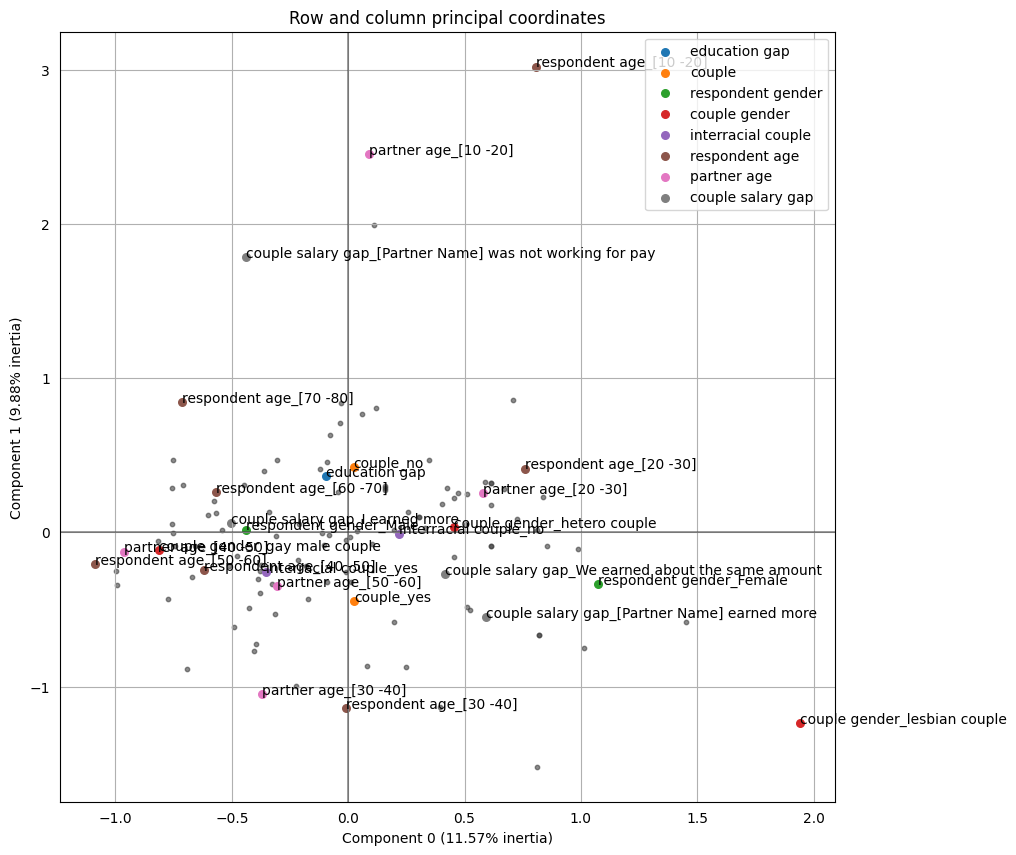

In [269]:
>>> ax = mca.plot_coordinates(
...     X=df_app[mca_cols],
...     ax=None,
...     figsize=(10, 10),
...     x_component=0,
...     y_component=1,
...     show_column_labels=True
... )

### K-MODE Analysis

In [234]:
cost = []
for num_clusters in list(range(1,10)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 10, verbose=1)
    kmode.fit_predict(df_mca)
    cost.append(kmode.cost_)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 192.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 188.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 184.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 180.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 

In [235]:
print(kmode.cluster_centroids_)

[[ 0.61385856  0.31840286]
 [ 0.8217926  -0.66501698]
 [ 0.61326358 -0.08666677]
 [ 0.30565357  0.09786117]
 [ 0.61267775  0.17653482]
 [-0.08311569 -0.01678299]
 [ 0.08139283 -0.86791704]
 [-0.51330868 -0.2161284 ]
 [-0.67322805 -0.29134311]]


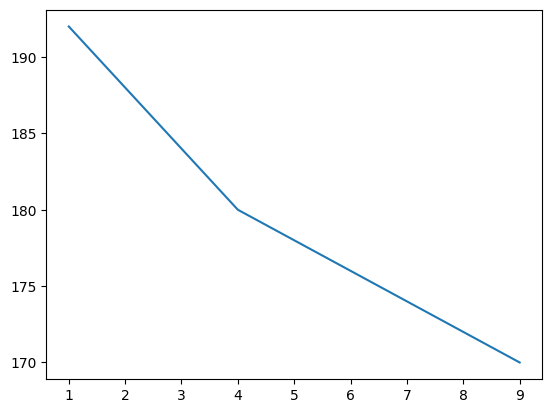

In [236]:
y = np.array([i for i in range(1,10,1)])
plt.plot(y,cost)

In [237]:
km_cao = KModes(n_clusters=4, init = "Cao", n_init = 10, verbose=1)
fitClusters_cao = km_cao.fit_predict(df_app)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 11, cost: 273.0
Run 1, iteration: 2/100, moves: 4, cost: 273.0


In [238]:
print(kmode.cluster_centroids_)

[[ 0.61385856  0.31840286]
 [ 0.8217926  -0.66501698]
 [ 0.61326358 -0.08666677]
 [ 0.30565357  0.09786117]
 [ 0.61267775  0.17653482]
 [-0.08311569 -0.01678299]
 [ 0.08139283 -0.86791704]
 [-0.51330868 -0.2161284 ]
 [-0.67322805 -0.29134311]]


In [239]:
df_app2 = df_app.reset_index()
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([df_app2, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)
cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 1]
cluster_2 = combinedDf[combinedDf['cluster_predicted'] == 2]
cluster_3 = combinedDf[combinedDf['cluster_predicted'] == 3]

In [240]:
combinedDfH = combinedDf.apply(lambda x: pd.factorize(x)[0])
X = combinedDfH.drop("cluster_predicted", axis=1)
y = combinedDfH["cluster_predicted"]

In [241]:
from lightgbm import LGBMClassifier
import shap
from sklearn.model_selection import cross_val_score

clf_kp = LGBMClassifier(colsample_by_tree=0.8)
cv_scores_kp = cross_val_score(clf_kp, X, y, scoring='f1_weighted')
print(f'CV F1 score for K-Prototypes clusters is {np.mean(cv_scores_kp)}')

[LightGBM] [Warning] Unknown parameter: colsample_by_tree
[LightGBM] [Warning] Unknown parameter: colsample_by_tree
[LightGBM] [Warning] Unknown parameter: colsample_by_tree
[LightGBM] [Warning] Unknown parameter: colsample_by_tree
[LightGBM] [Warning] Unknown parameter: colsample_by_tree
CV F1 score for K-Prototypes clusters is 0.8169394319131161


[LightGBM] [Warning] Unknown parameter: colsample_by_tree


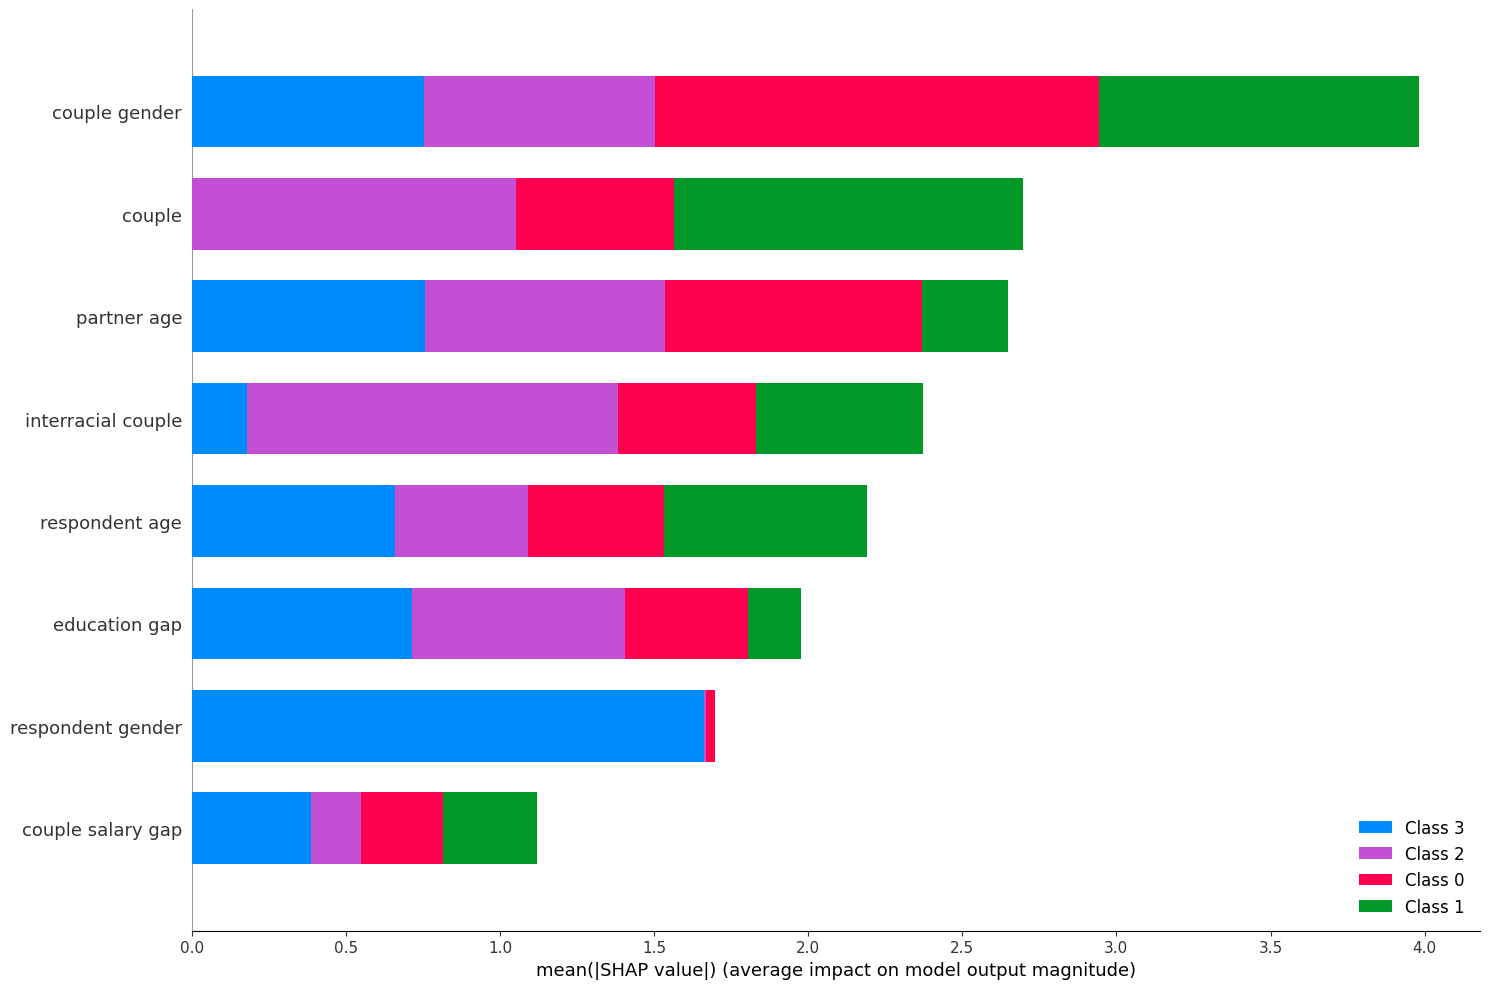

In [242]:
clf_kp.fit(X, y)
explainer_kp = shap.TreeExplainer(clf_kp)
shap_values_kp = explainer_kp.shap_values(X)
shap.summary_plot(shap_values_kp, X, plot_type="bar", plot_size=(15, 10))

# 2nd analysis refining

## DATASET PREP

In [243]:
dtafile2 = 'love_study_features_optimization_categorical.csv'

df2 = pd.read_csv(dtafile2)
df2.head()
use_app2 = df2["try app service"]=="yes"

df2_app = df2[use_app2]
df2_app = df2_app.drop(['try app service'], axis=1)
df2_app = df2_app.dropna(axis='columns')

df2_app = df2_app[["couple gender", "couple", "respondent age", "interracial couple"]]

df2_app = df2_app.rename(columns={'couple gender': 'Couple orientation', 'couple': 'Relationship status', 'respondent age': 'Age'})

df2_app

,Couple orientation,Relationship status,Age,interracial couple
12,hetero couple,no,[20 -30],no
40,hetero couple,yes,[40 -50],no
43,hetero couple,yes,[30 -40],no
94,hetero couple,yes,[40 -50],no
114,hetero couple,yes,[40 -50],yes
...,...,...,...,...
3470,hetero couple,no,[20 -30],no
3476,gay male couple,yes,[30 -40],no
3492,gay male couple,no,[50 -60],yes
3493,gay male couple,no,[30 -40],no


## MCA

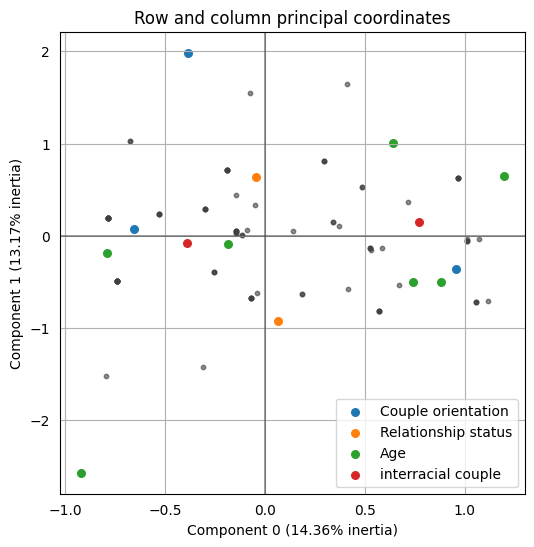

In [244]:
import prince

mca_cols2 = df2_app.columns

# instantiate MCA class
mca2 = prince.MCA(n_components = 2)

# get principal components
mca2 = mca2.fit(df2_app[mca_cols2])
ax = mca2.plot_coordinates(df2_app[mca_cols2])


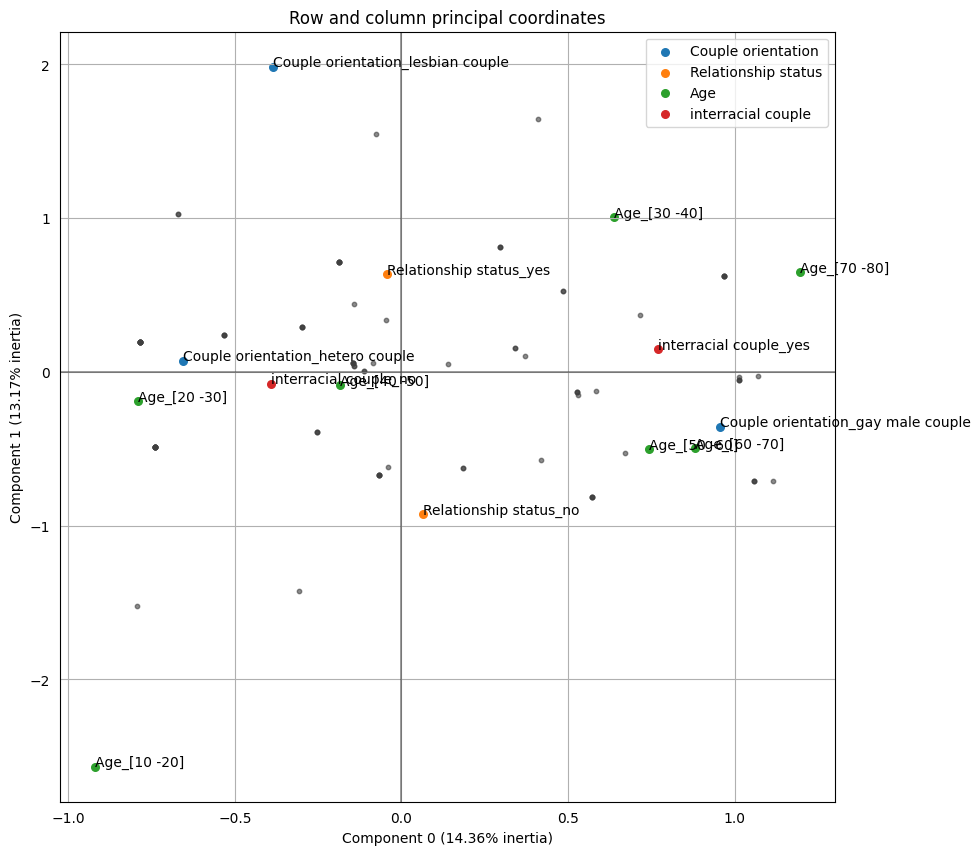

In [261]:
>>> ax = mca2.plot_coordinates(
...     X=df2_app[mca_cols2],
...     ax=None,
...     figsize=(10, 10),
...     x_component=0,
...     y_component=1,
...     show_column_labels=True
... )

In [259]:
mca2

MCA()

## CLUSTER

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 273.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 220.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 208.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 191.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 

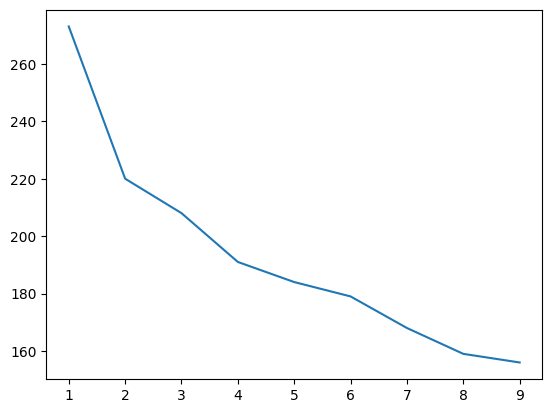

In [254]:
cost = []
for num_clusters in list(range(1,10)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 10, verbose=1)
    kmode.fit_predict(df2_app)
    cost.append(kmode.cost_)
    y = np.array([i for i in range(1,10,1)])
plt.plot(y,cost)

In [275]:
km_cao2 = KModes(n_clusters=4, init = "cao", n_init = 10, verbose=1)
fitClusters_cao = km_cao2.fit_predict(df2_app)
km_cao2

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 191.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 191.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 191.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 191.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 191.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 0, cost: 191.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 0, cost: 191.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 8, iteration: 1/100, moves:

KModes(init='cao', n_clusters=4, verbose=1)

In [274]:
print(km_cao2.cluster_centroids_)

[['12' 'hetero couple' 'yes' '[20 -30]' 'no']
 ['119' 'gay male couple' 'no' '[30 -40]' 'yes']
 ['236' 'gay male couple' 'yes' '[30 -40]' 'no']
 ['650' 'gay male couple' 'no' '[20 -30]' 'no']]


In [249]:
df2_app = df2_app.reset_index()
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf2 = pd.concat([df2_app, clustersDf], axis = 1).reset_index()
combinedDf2 = combinedDf2.drop(['index', 'level_0'], axis = 1)
cluster_0 = combinedDf2[combinedDf2['cluster_predicted'] == 0]
cluster_1 = combinedDf2[combinedDf2['cluster_predicted'] == 1]
cluster_2 = combinedDf2[combinedDf2['cluster_predicted'] == 2]
cluster_3 = combinedDf2[combinedDf2['cluster_predicted'] == 3]

In [250]:
combinedDfH2 = combinedDf2.apply(lambda x: pd.factorize(x)[0])
X2 = combinedDfH2.drop("cluster_predicted", axis=1)
y2 = combinedDfH2["cluster_predicted"]

In [251]:
clf_kp = LGBMClassifier(colsample_by_tree=0.8)
cv_scores_kp = cross_val_score(clf_kp, X2, y2, scoring='f1_weighted')
print(f'CV F1 score for K-Prototypes clusters is {np.mean(cv_scores_kp)}')

[LightGBM] [Warning] Unknown parameter: colsample_by_tree
[LightGBM] [Warning] Unknown parameter: colsample_by_tree
[LightGBM] [Warning] Unknown parameter: colsample_by_tree
[LightGBM] [Warning] Unknown parameter: colsample_by_tree
[LightGBM] [Warning] Unknown parameter: colsample_by_tree
CV F1 score for K-Prototypes clusters is 0.9911111111111112


[LightGBM] [Warning] Unknown parameter: colsample_by_tree


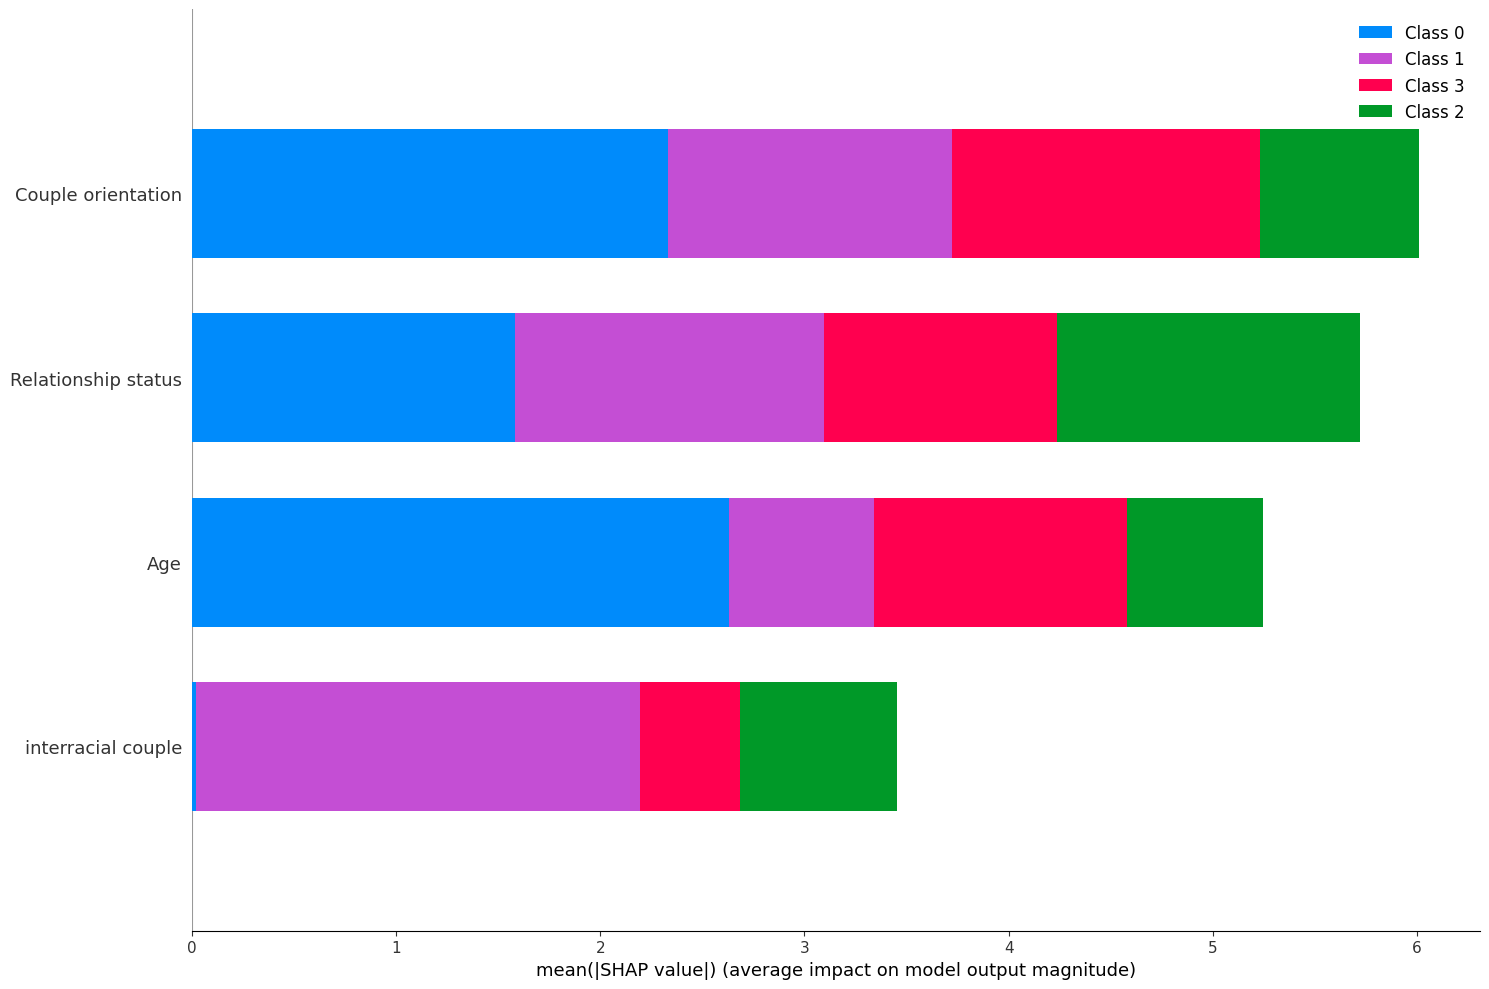

In [252]:
clf_kp.fit(X2, y2)
explainer_kp = shap.TreeExplainer(clf_kp)
shap_values_kp = explainer_kp.shap_values(X2)
shap.summary_plot(shap_values_kp, X2, plot_type="bar", plot_size=(15, 10))

In [253]:
print(kmode.cluster_centroids_)

[[ 0.61385856  0.31840286]
 [ 0.8217926  -0.66501698]
 [ 0.61326358 -0.08666677]
 [ 0.30565357  0.09786117]
 [ 0.61267775  0.17653482]
 [-0.08311569 -0.01678299]
 [ 0.08139283 -0.86791704]
 [-0.51330868 -0.2161284 ]
 [-0.67322805 -0.29134311]]
